In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

In [2]:
pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('spotify.csv')

In [4]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,artist_genres,track_name,artist_name,album,user
0,0.624,0.433,-9.572,0.0467,0.8370,0.029400,0.113,0.589,124.979,4h5x3XHLVYFJaItKuO2rhy,spotify:track:4h5x3XHLVYFJaItKuO2rhy,"['pop', 'r&b', 'rap']",Ghost in the Machine (feat. Phoebe Bridgers),SZA,SOS,Mimi
1,0.614,0.785,-8.224,0.0668,0.5490,0.842000,0.348,0.853,180.036,70jc6VUdHljHN6y2AGkpyC,spotify:track:70jc6VUdHljHN6y2AGkpyC,"['hip hop', 'ohio hip hop', 'pop rap', 'rap']",Mojo So Dope,Kid Cudi,Man On The Moon II: The Legend Of Mr. Rager (E...,Mimi
2,0.901,0.697,-3.439,0.2800,0.1450,0.000000,0.287,0.670,93.941,7KwZNVEaqikRSBSpyhXK2j,spotify:track:7KwZNVEaqikRSBSpyhXK2j,"['east coast hip hop', 'gangster rap', 'hardco...",Hypnotize - 2014 Remaster,The Notorious B.I.G.,Life After Death (2014 Remastered Edition),Mimi
3,0.559,0.345,-13.496,0.0459,0.0576,0.000105,0.141,0.458,84.581,3d9DChrdc6BOeFsbrZ3Is0,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,"['alternative rock', 'funk metal', 'funk rock'...",Under the Bridge,Red Hot Chili Peppers,Blood Sugar Sex Magik (Deluxe Edition),Mimi
4,0.615,0.550,-13.858,0.0349,0.0546,0.190000,0.747,0.549,95.488,3xGJuHvSxFJxxYlHj5BIoT,spotify:track:3xGJuHvSxFJxxYlHj5BIoT,"['album rock', 'art rock', 'classic rock', 'pr...",Young Lust,Pink Floyd,The Wall,Mimi


In [5]:
import ast
from wordcloud import WordCloud, STOPWORDS

In [6]:
mimi_genre = []
for index, row in df.iterrows():
    if row['user']=='Mimi':
        (mimi_genre.append(ast.literal_eval(row['artist_genres'])))

In [7]:
mimi_words = [i for x in mimi_genre for i in x]

In [8]:
comment_words = ''
stopwords = set(STOPWORDS)

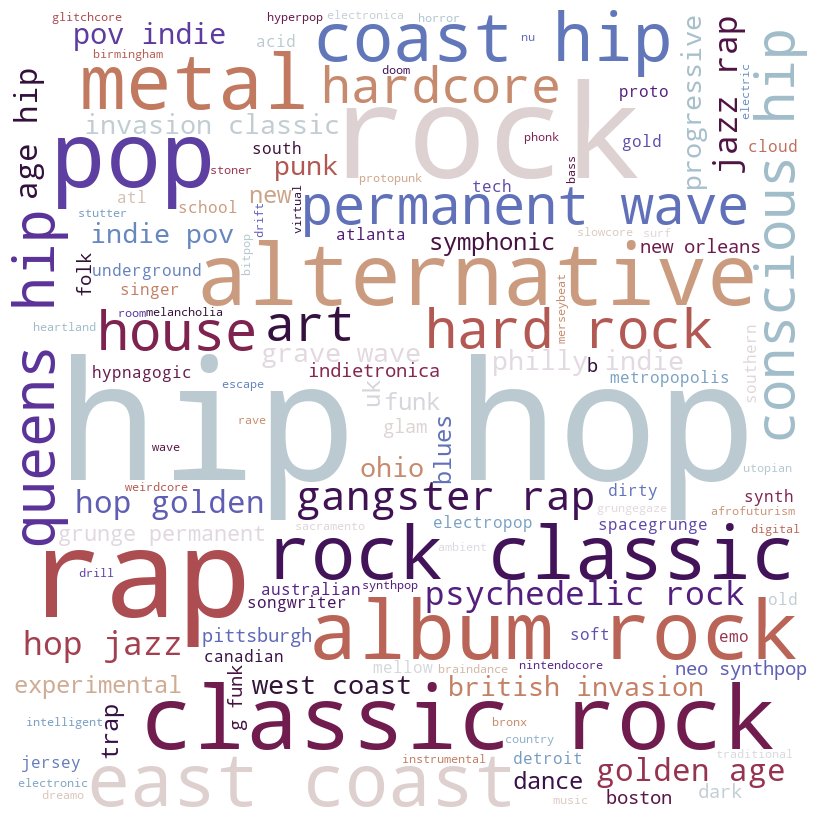

In [9]:
for i in range(len(mimi_words)):
        mimi_words[i] = mimi_words[i].lower()
     
comment_words += " ".join(mimi_words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                colormap = 'twilight').generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

plt.savefig('mimi_cloud.png')

In [10]:
ari_genre = []
for index, row in df.iterrows():
    if row['user']=='Arielle':
        (ari_genre.append(ast.literal_eval(row['artist_genres'])))
    

In [11]:
ari_words = [i for x in ari_genre for i in x]

In [12]:
comment_words2 = ''
stopwords = set(STOPWORDS)

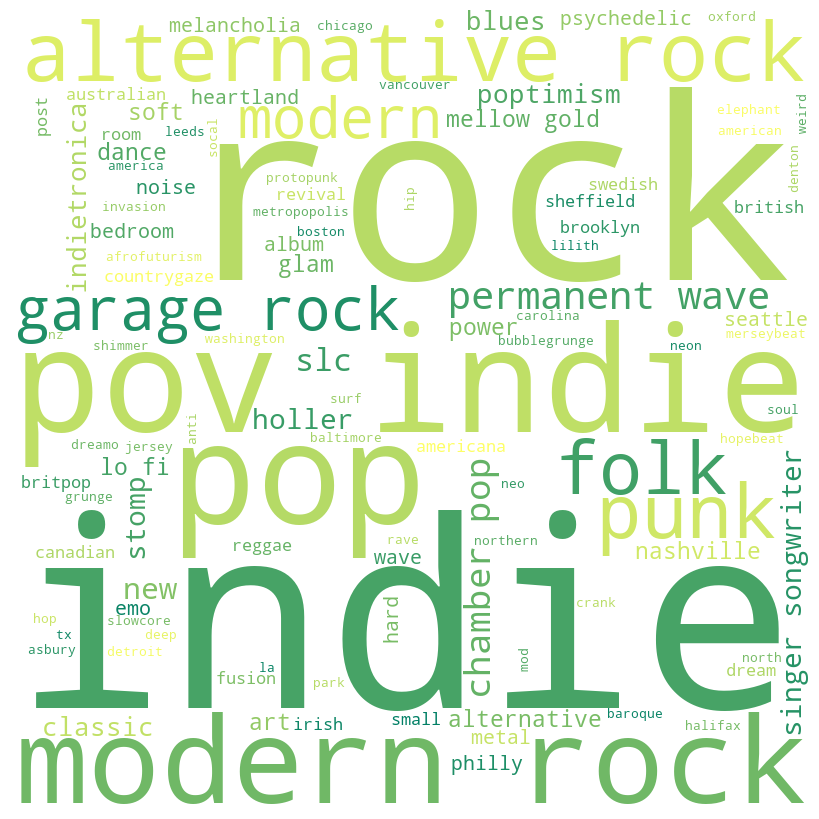

In [13]:
for i in range(len(ari_words)):
        ari_words[i] = ari_words[i].lower()
     
comment_words2 += " ".join(ari_words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                colormap = 'summer').generate(comment_words2)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('arielle_cloud.png')

In [14]:
justin_genre = []
for index, row in df.iterrows():
    if row['user']=='Justin':
        (justin_genre.append(ast.literal_eval(row['artist_genres'])))

In [15]:
comment_words3 = ''
stopwords = set(STOPWORDS)

In [16]:
justin_words = [i for x in justin_genre for i in x]

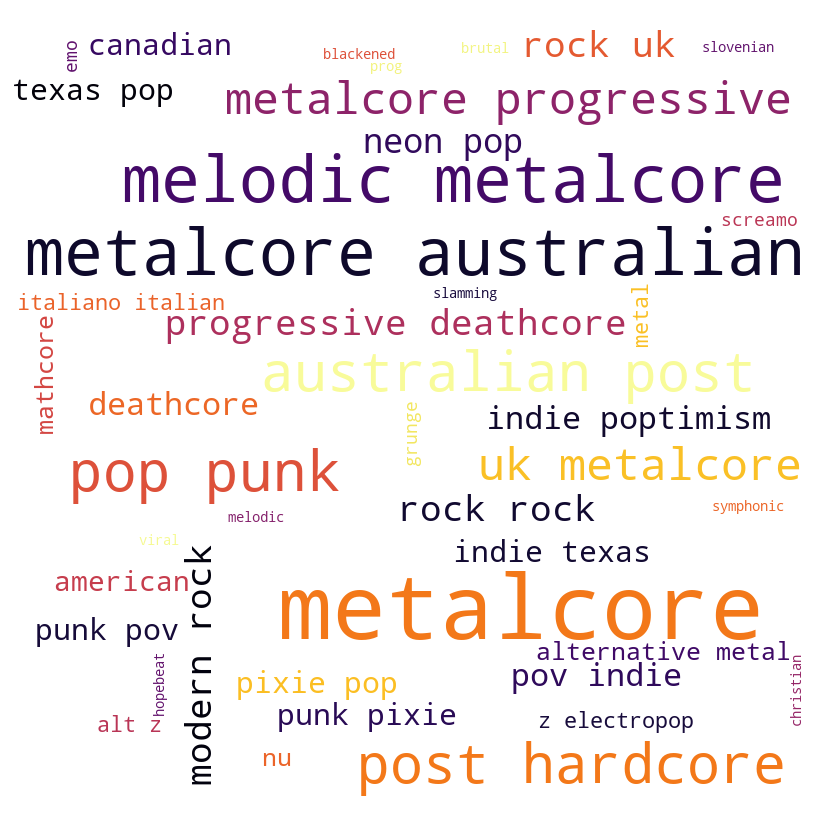

In [17]:
for i in range(len(justin_words)):
        justin_words[i] = justin_words[i].lower()
     
comment_words3 += " ".join(justin_words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                colormap='inferno').generate(comment_words3)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.savefig('justin_cloud.png')

	1. Scatter plot showing liveliness vs tempo, colored by users and select/highlight different users (altair) 
tooltip w song name

In [18]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri',
       'artist_genres', 'track_name', 'artist_name', 'album', 'user'],
      dtype='object')

In [19]:
import altair as alt

# Establishing selection via region
selection = alt.selection_single(fields=['user'])

# Color mapping
color_mapping = {'Arielle': "#67a34f", 'Mimi': '#540b84', 'Justin': '#ea9726'}

# Establishing color change based on selection
color = alt.condition(
    selection,
    alt.Color('user:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values())), legend=None),
    alt.value('lightgrey')
)

# Declaring chart
chart1 = alt.Chart(df).mark_circle().encode(
    alt.X('danceability:Q', title='Danceability'),
    alt.Y('tempo:Q', title='Tempo'),
    
    # Declaring tooltip
    alt.Tooltip(['user:N', 'track_name:N', 'tempo:Q', 'danceability:Q', 'artist_name:N']),
    
    # Declaring color
    color=color
).add_selection(selection).properties(
    height=200,
    width=500,
    title='Danceability vs Tempo'
)

# Creating legend
legend = alt.Chart(df).mark_circle().encode(
    y=alt.Y('user:N', title='User'),
    color=alt.Color('user:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values())), legend=None)
).add_selection(selection)

# Combining chart and legend
interact_1 = (chart1 | legend)


/Users/ariellerabinovich/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/ariellerabinovich/anaconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


In [20]:
interact_1

alt.HConcatChart(...)

In [21]:
interact_1.save('interact1.html')

One scatter plot showing liveness vs acousticness then when you highlight a section, selects on scatter plot below showing danceability and acousticness
		a.  tooltip w song name (altair)

In [22]:
colors = ["#540b84", "#67a34f", "#ea9726"]
color_scale = alt.Scale(domain=df['user'].unique().tolist(),
                        range= colors)

# establishing selection via region
selection = alt.selection_point(fields = ['user']) 


# establishing color change based off selection
color = alt.condition(
    selection,
    alt.Color('user:N', scale=color_scale, legend=None),
    alt.value('lightgrey'))

# establishing brush
brush = alt.selection_interval(encodings=['x'])


#declaring chart
chart2 = alt.Chart(df).mark_circle().encode(
    alt.X('acousticness:Q', title='Acousticness'),
    alt.Y('liveness:Q', title='Liveliness'),
    
    #declaring tooltip
    alt.Tooltip(['user:N','track_name:N','liveness:Q',  'acousticness:Q','artist_name:N']),
    
    #declaring color
    color = color

).add_params(selection,brush).properties(
    height=200,
    width=500,
title = 'Liveliness vs Acousticness')


#creating legend
legend = alt.Chart(df).mark_circle().encode(
alt.Y('user:N'),
    # allowing to select color from legend
    color=color

).add_params(selection)

chart3 = alt.Chart(df).mark_circle().encode(
    alt.X('acousticness:Q', title='Acousticness').scale(domain=brush),
    alt.Y('danceability:Q', title='danceability'),
    
    #declaring tooltip
    alt.Tooltip(['user:N','track_name:N','danceability:Q',  'acousticness:Q','artist_name:N']),
    
    #declaring color
    color = color

).add_params(selection).properties(
    height=200,
    width=500,
title = 'Acousticness and Danceability')


chart4 = ((chart2|legend)&chart3)
chart4

alt.VConcatChart(...)

In [23]:
chart4.save('interact_2.html')

In [24]:
unique_ari_words = list(set(ari_words))
print(len(unique_ari_words))


120


In [25]:
unique_justin_words = list(set(justin_words))
print(len(unique_justin_words))

40


In [26]:
unique_mimi_words = list(set(mimi_words))
print(len(unique_mimi_words))

121


In [27]:
dict_overall = {
    'user':['arielle','mimi','justin'],
    'unique genres':[120,121,40]
  
}
df_genres = pd.DataFrame(dict_overall)

In [28]:
df_genres

,user,unique genres
0,arielle,120
1,mimi,121
2,justin,40


In [29]:
import seaborn as sns

In [30]:

# Define colors for each user
color_scheme = alt.Scale(domain=['arielle', 'mimi', 'justin'],
                         range=["#67a34f","#540b84", "#ea9726"])

# Create a bar plot using Altair with specific colors for each user
bar_plot = alt.Chart(df_genres).mark_bar().encode(
    x=alt.X('user', axis=alt.Axis(title='User')),
    y=alt.Y('unique genres', axis=alt.Axis(title='Unique Genres')),
    color=alt.Color('user', scale=color_scheme, legend=None)  # Specify colors
)

# Customize the appearance of the plot
bar_plot = bar_plot.properties(
    title='Number of Unique Genres by User'
).configure_axis(
    grid=False
).properties(
    width=500,  # Specify the width of the canvas
    height=500  # Specify the height of the canvas
)

# Show the plot
bar_plot


alt.Chart(...)